In [113]:
import numpy as np
import pandas as pd

In [114]:
df = pd.read_csv('email.csv')

In [115]:
df.sample(5)

,Category,Message
4351,ham,Yes. Rent is very expensive so its the way we ...
1496,ham,Hey gals.. Anyone of u going down to e driving...
5200,spam,Call Germany for only 1 pence per minute! Call...
5131,ham,That sucks. I'll go over so u can do my hair. ...
2386,spam,Someone has contacted our dating service and e...


In [116]:
df.shape

(5572, 2)

In [117]:
# 1. Data Cleaning (for removing NAN values for datasets)
# 2. EDA (Exploratory Data Analysis)
# 3. Text Preprocessing (like : Vectorisation, Stamming, Remove Stopwords,etc)
# 4. Model Building 
# 5. Evaluation
# 6. Improvement (Depending on the evoluation)
# 7. Website
# 8. Deploy (On Heroku)

# 1. Data Cleaning 

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Note : In our dataset no extra value , column given, so just change the ham 0r spam name as 0 or 1

In [119]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [120]:
df['Category'] = encoder.fit_transform(df['Category'])

In [121]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
# Checking Missing Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [123]:
# Checking Duplicate Values
df.duplicated().sum()

415

In [124]:
# Remove Duplicates Values
df = df.drop_duplicates(keep='first')

In [125]:
df.duplicated().sum()

0

In [126]:
df.shape

(5157, 2)

# 2. EDA (Exploratory Data Analysis)

In [127]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

For Better Representation like : Pychart


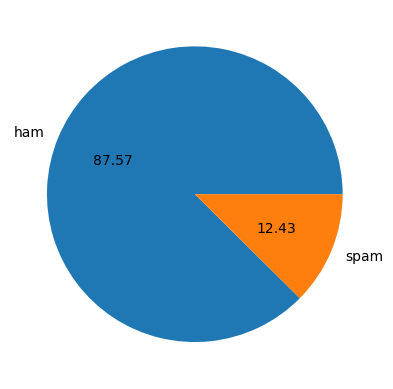

In [129]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [130]:
# Data is imbalanced

In [131]:
# NLTK (Natural Language ToolKit)
import nltk

In [132]:
!pip install nltk

In [133]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
# No. of Characters
df['num_characters'] = df['Message'].apply(len)

In [135]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [136]:
# No. of Words
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [137]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [138]:
# No. of Sentences
df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [139]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [140]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [141]:
# We analysis Ham and Spam Messages (Individually)

#Ham 
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [142]:
#Spam 
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [143]:
# Represents in the form of Histogram, We use
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

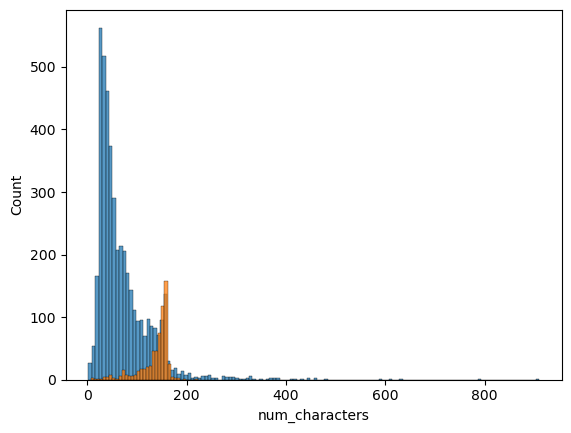

In [144]:
# Blue - Showing Ham Messages for no. of Characters
# Orange - Showing Spam Messages for no. of Characters

sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

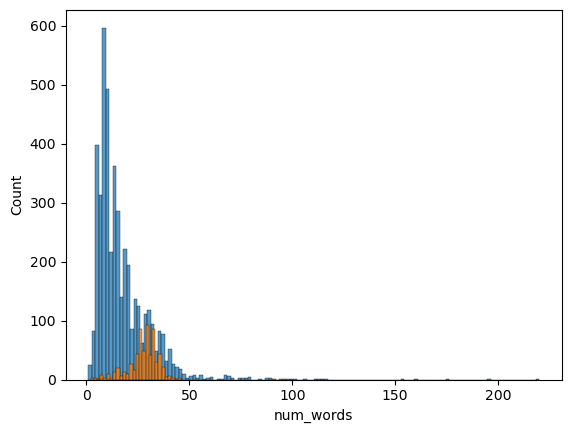

In [145]:
# Blue - Showing Ham Messages for no. of Words
# Orange - Showing Spam Messages for no. of Words

sns.histplot(df[df['Category']==0]['num_words'])
sns.histplot(df[df['Category']==1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

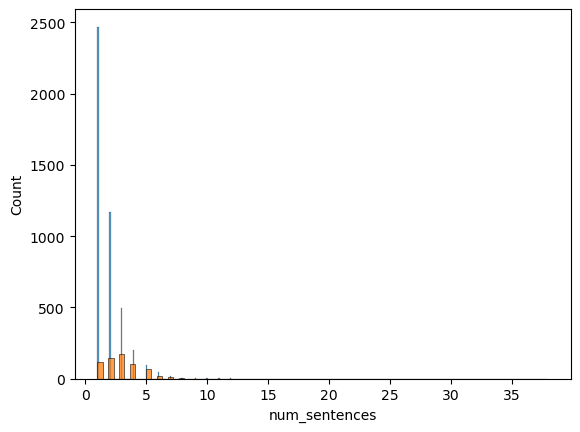

In [146]:
# Blue - Showing Ham Messages for no. of Sentences
# Orange - Showing Spam Messages for no. of Sentences

sns.histplot(df[df['Category']==0]['num_sentences'])
sns.histplot(df[df['Category']==1]['num_sentences'])

C:\Users\Ashish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


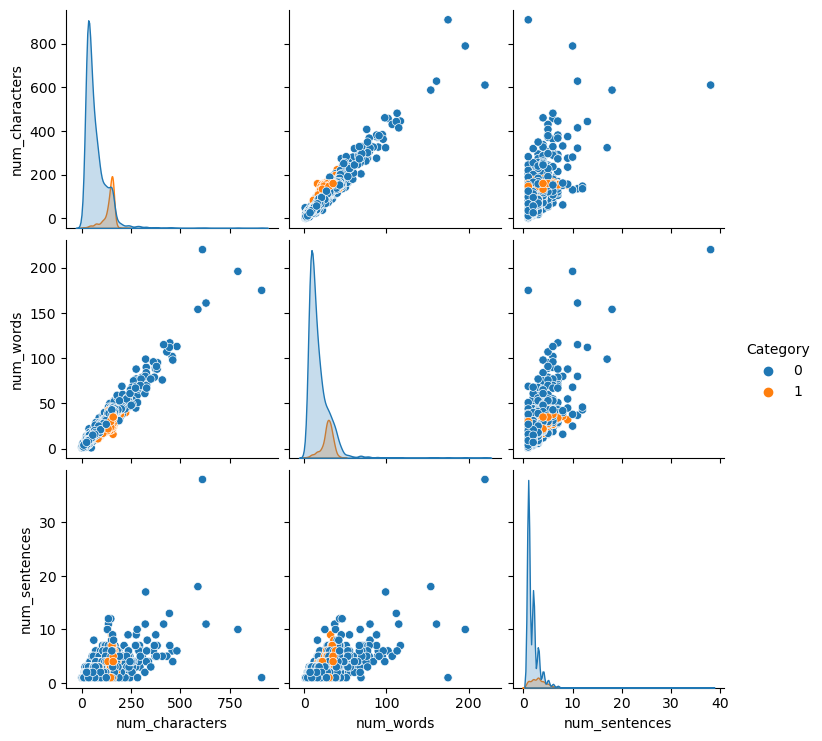

In [147]:
sns.pairplot(df,hue='Category')

In [148]:
# sns.heatmap(numeric_df.corr(),annot=True)

In [149]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Data Preprocessing

Lower case     
Tokenization    
Removing Special Characters   
Removing Stop Words and punctuation    
Stemming

In [150]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

In [151]:
import string

In [152]:
def transform_msg(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y=[]
    for i in Message:
        if i.isalnum():
            y.append(i)
            
    Message = y[:] #cloning list because list can't be copy
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
            
    Message = y[:] #cloning list because list can't be copy
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
    return " ".join(y)

In [153]:
df['transformed_msg'] = df['Message'].apply(transform_msg)

In [154]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [155]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [156]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [157]:
spam_wc = wc.generate(df[df['Category'] == 1 ]['transformed_msg'].str.cat(sep=""))

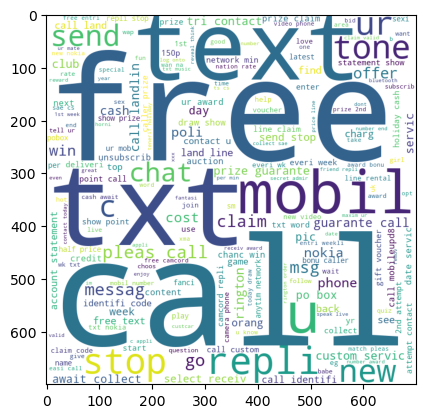

In [158]:
plt.imshow(spam_wc)

In [159]:
ham_wc = wc.generate(df[df['Category'] == 0 ]['transformed_msg'].str.cat(sep=""))

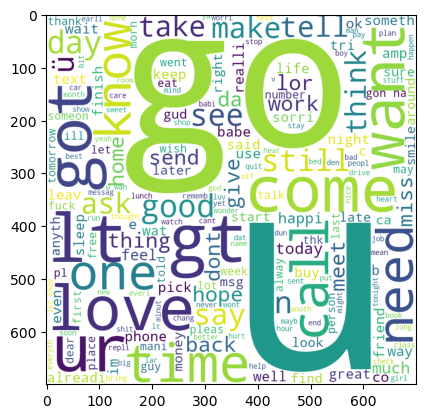

In [160]:
plt.imshow(spam_wc)

In [161]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [162]:
# top 30 ham and spam msg [Extract] from data who comes from wordcloud
# [Important Part For Learn]
# For Spam

spam_corpus = []
for msg in df[df['Category'] == 1] ['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [163]:
#Total Words in All Spam Message 

len(spam_corpus)

9781

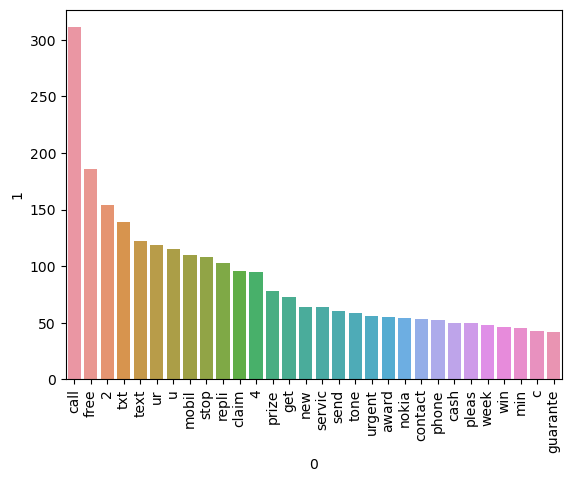

In [164]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [165]:
# [Important Part For Learn]
# For Ham

ham_corpus = []
for msg in df[df['Category'] == 0] ['transformed_msg'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [166]:
#Total Words in All Spam Message 

len(ham_corpus)

35940

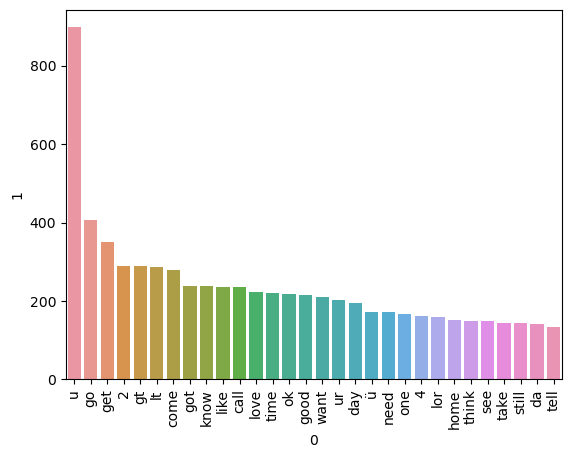

In [167]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [168]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [169]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# tdidf vectorizer value changed for improve model

In [170]:
print(df.columns)


Index(['Category', 'Message', 'num_characters', 'num_words', 'num_sentences',
       'transformed_msg'],
      dtype='object')


In [171]:
X = tfidf.fit_transform(df['transformed_msg']).toarray()

In [172]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# Scaling results do little bit accuracy improve but t do reduce precision.

In [173]:
# appending the num_character col to X

#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

# It reduces our accuracy.

In [174]:
X.shape

(5157, 3000)

In [175]:
y = df['Category'].values

In [176]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
# 0.2 means 20% gives a text data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [179]:
# Now we call our Algorithm

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [180]:
# Creates Objects for these 3's

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [181]:
# For 1 one GaussianNB

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [182]:
# For 2 one MultinomialNB

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [183]:
# For 3 one BernoulliNB

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


# We Choose : tfidf ---> MNB

In [184]:
# Now We take more Machine Learning Models and compare with MNB 

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [186]:
lrc = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [187]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GDBT' : gdbt
}

In [188]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [189]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [190]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy :  0.9583333333333334
Precision :  0.9375
For  SVC
Accuracy :  0.9757751937984496
Precision :  0.9811320754716981
For  NB
Accuracy :  0.9709302325581395
Precision :  1.0
For  DT
Accuracy :  0.936046511627907
Precision :  0.8210526315789474
For  KN
Accuracy :  0.9127906976744186
Precision :  1.0
For  RF
Accuracy :  0.9728682170542635
Precision :  1.0
For  AdaBoost
Accuracy :  0.9660852713178295
Precision :  0.9423076923076923
For  BgC
Accuracy :  0.9612403100775194
Precision :  0.8918918918918919
For  ETC
Accuracy :  0.9777131782945736
Precision :  0.9905660377358491
For  GDBT
Accuracy :  0.9554263565891473
Precision :  0.9764705882352941


In [191]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [192]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.970930,1.000000
4,KN,0.912791,1.000000
5,RF,0.972868,1.000000
8,ETC,0.977713,0.990566
1,SVC,0.975775,0.981132
9,GDBT,0.955426,0.976471
6,AdaBoost,0.966085,0.942308
0,LR,0.958333,0.937500
7,BgC,0.961240,0.891892
3,DT,0.936047,0.821053


# Model improve
# 1. Change the max_features parameter of TfIdf

In [193]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [194]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.970930,1.000000,0.970930,1.000000
1,KN,0.912791,1.000000,0.912791,1.000000
2,RF,0.972868,1.000000,0.972868,1.000000
3,ETC,0.977713,0.990566,0.977713,0.990566
4,SVC,0.975775,0.981132,0.975775,0.981132
5,GDBT,0.955426,0.976471,0.955426,0.976471
6,AdaBoost,0.966085,0.942308,0.966085,0.942308
7,LR,0.958333,0.937500,0.958333,0.937500
8,BgC,0.961240,0.891892,0.961240,0.891892
9,DT,0.936047,0.821053,0.936047,0.821053


In [195]:
# Voting Classifier also reduces our precision

In [196]:
# Applying Stacking

# It also reduces our precision

In [197]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))